In [49]:
# Case Study 4: Air Quality Prediction in Urban Areas 
# Problem Statement: Air pollution is a severe challenge in urban areas, impacting public 
# health and the environment. Accurately predicting air quality levels can help city officials 
# take timely actions to reduce emissions or warn the public. Traditional methods of monitoring 
# air quality are limited by the number of sensors and real-time reporting. AI models can fill 
# these gaps by using available sensor data combined with weather and traffic information. 
# Real-Life Example: In Delhi, one of the most polluted cities in the world, a local 
# environmental agency used AI to predict air quality indices (AQI) with a 24-hour lead time. 
# By analyzing traffic, meteorological data, and pollutant levels, the model helped the city issue 
# early warnings, allowing citizens to take preventive measures, such as staying indoors or 
# reducing outdoor activities on high-pollution days. 
# Dataset: You are provided with air quality data (PM2.5, PM10, NO2, CO), traffic data, and 
# weather conditions over three years.  

In [50]:
import os
import pandas as pd

# Define the file path
file_path = "C:/Users/ssmp5/Downloads/city_day.csv"

# Check if the file exists
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    print(df.head())  # Display the first few rows of the dataframe
else:
    print(f"File not found: {file_path}")


File found: C:/Users/ssmp5/Downloads/city_day.csv
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [51]:
train_df = pd.read_csv('C:/Users/ssmp5/Downloads/city_day.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
display(train_df.head())

Train Dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [52]:
train_df.shape
train_df.dtypes
train_df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [53]:
#DATA CLEANING

In [54]:
#Fill the blank cells with the mean of the values
mean=train_df['PM2.5'].mean()
mean=int(mean)
train_df['PM2.5']=train_df['PM2.5'].fillna(mean)

In [55]:
mean=train_df['PM10'].mean()
mean=int(mean)
train_df['PM10'] = train_df['PM10'].fillna(mean)

In [56]:
mean=train_df['NO'].mean()
mean=int(mean)
train_df['NO'] = train_df['NO'].fillna(mean)

In [57]:
mean=train_df['NO2'].mean()
mean=int(mean)
train_df['NO2'] = train_df['NO2'].fillna(mean)

In [58]:
mean=train_df['CO'].mean()
mean=int(mean)
train_df['CO'] = train_df['CO'].fillna(mean)

In [59]:
mean=train_df['SO2'].mean()
mean=int(mean)
train_df['SO2'] = train_df['SO2'].fillna(mean)

In [60]:
mean=train_df['O3'].mean()
mean=int(mean)
train_df['O3'] = train_df['O3'].fillna(mean)

In [61]:
mean=train_df['AQI'].mean()
mean=int(mean)
train_df['AQI'] = train_df['AQI'].fillna(mean)

In [62]:
#Checking how many null values are left
train_df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [ ]:
#Removing the columns with null values
train_df=train_df.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)

In [63]:
#Displaying the remaining columns
train_df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [64]:
# Display the first 10 rows of the dataset to get a quick overview of the data
train_df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.0,118.0,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,166.0,NaN
1,Ahmedabad,2015-01-02,67.0,118.0,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,166.0,NaN
2,Ahmedabad,2015-01-03,67.0,118.0,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,166.0,NaN
3,Ahmedabad,2015-01-04,67.0,118.0,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,166.0,NaN
4,Ahmedabad,2015-01-05,67.0,118.0,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,166.0,NaN
5,Ahmedabad,2015-01-06,67.0,118.0,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,166.0,NaN
6,Ahmedabad,2015-01-07,67.0,118.0,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,166.0,NaN
7,Ahmedabad,2015-01-08,67.0,118.0,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,166.0,NaN
8,Ahmedabad,2015-01-09,67.0,118.0,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,166.0,NaN
9,Ahmedabad,2015-01-10,67.0,118.0,17.00,7.04,0.00,NaN,2.00,8.29,4.55,0.00,0.00,0.00,166.0,NaN


In [ ]:
# Generate descriptive statistics for the integer-converted dataset
prepareddata.describe()

In [ ]:
#DATA VISUALIZATION

In [ ]:
# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

# Making sure that plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Seaborn for enhanced visualizations
import seaborn as sns


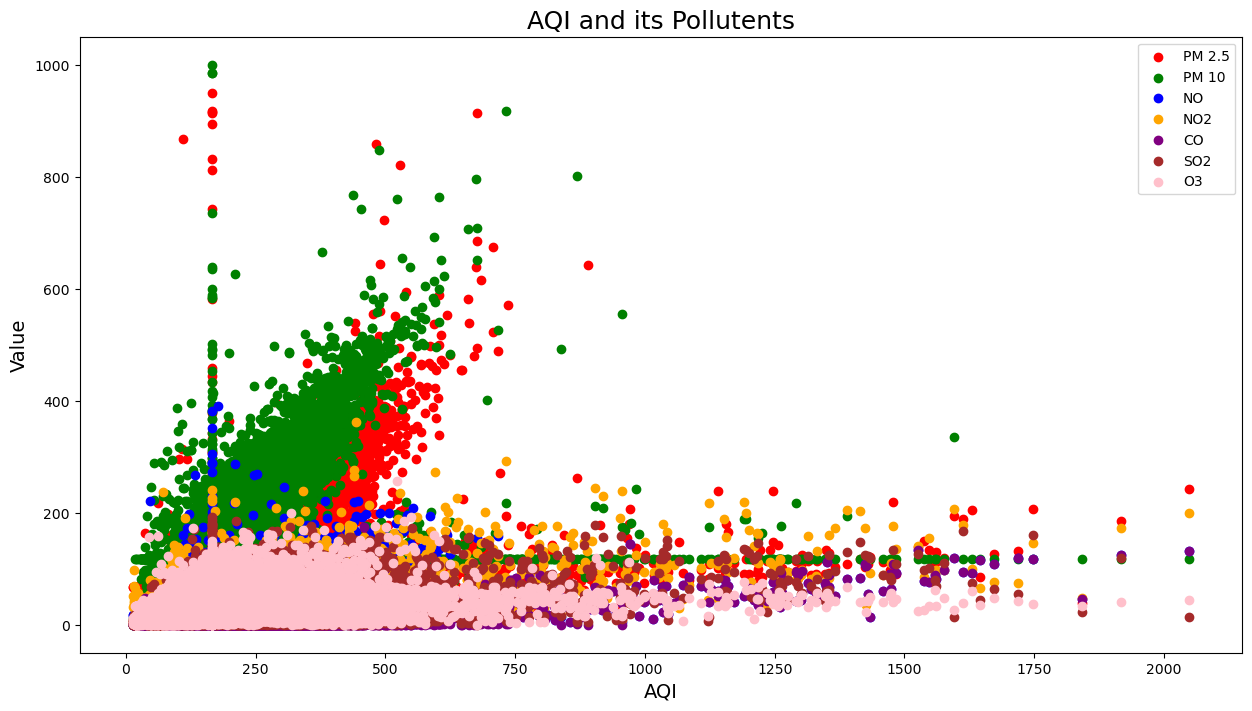

In [66]:
# Scatter plot showing the relationship between AQI and different pollutants
x=prepareddata['AQI']
y1=prepareddata['PM2.5']
y2=prepareddata['PM10']
y3=prepareddata['NO']
y4=prepareddata['NO2']
y5=prepareddata['CO']
y6=prepareddata['SO2']
y7=prepareddata['O3']
plt.figure(figsize=(15,8))
plt.scatter(x, y1, label='PM 2.5', color='red')
plt.scatter(x, y2, label='PM 10', color='green')
plt.scatter(x, y3, label='NO', color='blue')
plt.scatter(x, y4, label='NO2', color='orange')
plt.scatter(x, y5, label='CO', color='purple')
plt.scatter(x, y6, label='SO2', color='brown')
plt.scatter(x, y7, label='O3', color='pink')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

<Axes: >

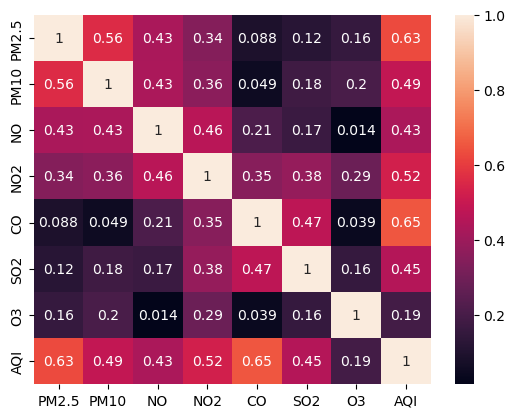

In [67]:
# Compute the correlation matrix for the dataset and visualize it using a heatmap
corr = prepareddata.corr()
sns.heatmap(corr, annot=True)

In [68]:
#DATA TRAINING

In [69]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have Air Quality Index(AQI).
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]  
y=prepareddata['AQI']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [71]:
#MODEL CREATION

In [72]:
#LINEAR REGRESSION
#Import required libraries/model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [73]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [74]:
# Making predictions 
pred1 = reg1.predict(x_test)

In [75]:
print("Accuracy of the Linear Regression model : \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the Linear Regression model : 
 
0.7921054308315605


In [76]:
#DECISION TREE REGRESSOR

In [77]:
# Importing decision tree regressor library/model 
from sklearn.tree import DecisionTreeRegressor 
reg4 = DecisionTreeRegressor()

In [78]:
#Fitting data into the model.
reg4.fit(x_train, y_train)

DecisionTreeRegressor()

In [79]:
pred4 = reg4.predict(x_test)

In [80]:
print("Accuracy of the Decision Tree Regressor : \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor : 
 
0.9991522424787798


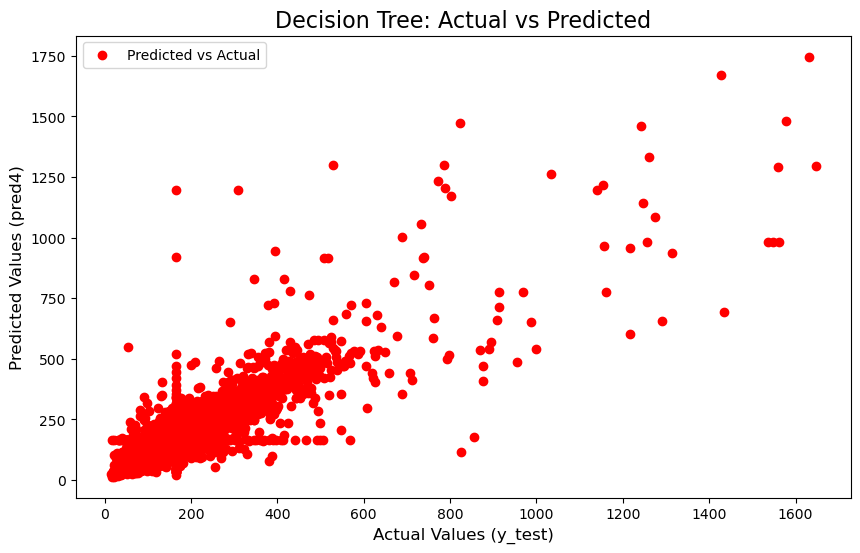

Accuracy of the Decision Tree Regressor model on the test set (R-squared): 0.7679


In [81]:
import matplotlib.pyplot as plt
#Importing libraries/models for r2 score to measure the correct accuracy
from sklearn.metrics import r2_score

# Assuming x_test and y_test are already defined
pred4 = reg4.predict(x_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred4, color='red', label='Predicted vs Actual')
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (pred4)', fontsize=12)
plt.title('Decision Tree: Actual vs Predicted', fontsize=16)
plt.legend()
plt.show()

# Calculate the R-squared score to evaluate the accuracy of the model on the test set
accuracy = r2_score(y_test, pred4)
print(f"Accuracy of the Decision Tree Regressor model on the test set (R-squared): {accuracy:.4f}")